In [61]:
#dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns
from scipy import stats
from sklearn import datasets



In [2]:
# Store filepath in a variable
csv_path = "Resources/Life_Expectancy.csv"

# Source of CSV file
# https://www.kaggle.com/kumarajarshi/life-expectancy-who/version/1

In [3]:
#READ IN CSV
life_exp = pd.read_csv(csv_path, encoding="utf-8")
life_exp

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
#United States test

usa = life_exp.loc[life_exp['Country'] =="United States of America"]
renamed_usa = usa.rename(columns={"Life expectancy":"Life_Expectancy", "Adult Mortality":"Adult_Mortality"})
renamed_usa.head()




,Country,Year,Status,Life expectancy,Adult_Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2794,United States of America,2015,Developed,79.3,13.0,23,NaN,0.0,92.0,188,...,93.0,NaN,95.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2795,United States of America,2014,Developed,79.1,14.0,23,8.82,0.0,92.0,667,...,93.0,17.14,95.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2796,United States of America,2013,Developed,78.9,16.0,23,8.82,0.0,91.0,187,...,93.0,16.90,94.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2797,United States of America,2012,Developed,78.8,16.0,24,8.82,0.0,9.0,55,...,93.0,17.20,94.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2798,United States of America,2011,Developed,78.7,16.0,25,8.67,0.0,91.0,220,...,94.0,17.60,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN


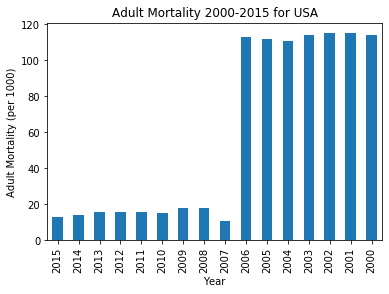

In [5]:
#USA bar to show year versus adult mortality

renamed_usa.plot(x="Year", y="Adult_Mortality", kind='bar', legend=False)
plt.title("Adult Mortality 2000-2015 for USA")
plt.xlabel("Year")
plt.ylabel("Adult Mortality (per 1000)")
plt.show()

#What happened in 2007 for this drop?

In [6]:
year_2015 = life_exp.loc[life_exp['Year'] ==2015]
year_2015.columns = year_2015.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
year_2015

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.000000,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.000000,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.000000,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.000000,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


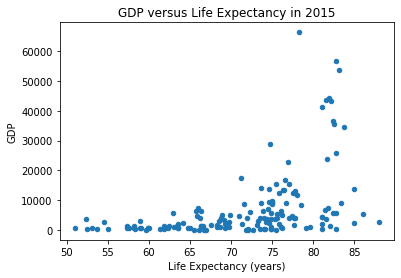

In [7]:
#scatter to show GDP versus life expectancy in 2015 - not Nabeel's GDP file

year_2015.plot(x="life_expectancy", y="gdp", kind='scatter', legend=False)
plt.title("GDP versus Life Expectancy in 2015")
plt.xlabel("Life Expectancy (years)")
plt.ylabel("GDP")
plt.show()

In [8]:
year_2015.count()

country                            183
year                               183
status                             183
life_expectancy                    183
adult_mortality                    183
infant_deaths                      183
alcohol                              6
percentage_expenditure             183
hepatitis_b                        174
measles                            183
bmi                                181
under-five_deaths                  183
polio                              183
total_expenditure                    2
diphtheria                         183
hiv/aids                           183
gdp                                154
population                         142
thinness__1-19_years               181
thinness_5-9_years                 181
income_composition_of_resources    173
schooling                          173
dtype: int64

In [9]:
#drop alcohol, total_expenditure

year_2015.dropna(subset=['alcohol', 'total_expenditure'])
year_2015

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.000000,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.000000,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.000000,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.000000,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


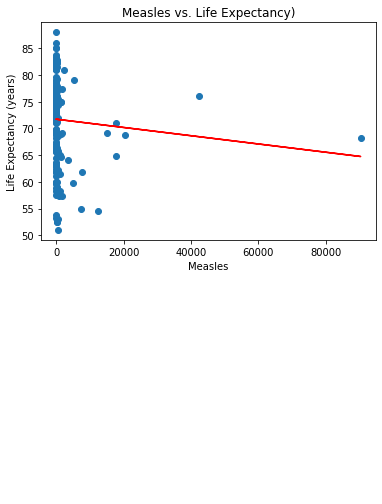

The r-squared is: -0.07461651782605935


In [10]:
x_values = year_2015['measles']
y_values = year_2015['life_expectancy']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,1),fontsize=1,color="red")
plt.title("Measles vs. Life Expectancy)")
plt.xlabel("Measles")
plt.ylabel("Life Expectancy (years)")
plt.show()

print(f"The r-squared is: {rvalue}")

In [11]:
# Store filepath in a variable
csv_path = "Resources/Life_1970.csv"

life_1970 = pd.read_csv(csv_path, encoding="utf-8")
life_1970

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,LIFEEXP,MEN,YR,A,1960,67.9,NaN
1,AUS,LIFEEXP,MEN,YR,A,1961,68.0,NaN
2,AUS,LIFEEXP,MEN,YR,A,1962,67.8,NaN
3,AUS,LIFEEXP,MEN,YR,A,1963,67.9,NaN
4,AUS,LIFEEXP,MEN,YR,A,1964,67.5,NaN
...,...,...,...,...,...,...,...,...
6985,CRI,LIFEEXP,WOMEN,YR,A,2014,82.3,NaN
6986,CRI,LIFEEXP,WOMEN,YR,A,2015,82.4,NaN
6987,CRI,LIFEEXP,WOMEN,YR,A,2016,82.6,NaN
6988,CRI,LIFEEXP,WOMEN,YR,A,2017,82.7,NaN


In [12]:
life_1970.count()

LOCATION      6990
INDICATOR     6990
SUBJECT       6990
MEASURE       6990
FREQUENCY     6990
TIME          6990
Value         6990
Flag Codes      45
dtype: int64

In [13]:
len(life_1970['LOCATION'].unique())


44

In [14]:
usa_1970 = life_1970.loc[life_1970['LOCATION'] =='USA']
usa_1970

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
4719,USA,LIFEEXP,MEN,YR,A,1960,66.6,NaN
4720,USA,LIFEEXP,MEN,YR,A,1961,67.1,NaN
4721,USA,LIFEEXP,MEN,YR,A,1962,66.9,NaN
4722,USA,LIFEEXP,MEN,YR,A,1963,66.6,NaN
4723,USA,LIFEEXP,MEN,YR,A,1964,66.8,NaN
...,...,...,...,...,...,...,...,...
4888,USA,LIFEEXP,WOMEN,YR,A,2013,81.2,NaN
4889,USA,LIFEEXP,WOMEN,YR,A,2014,81.3,NaN
4890,USA,LIFEEXP,WOMEN,YR,A,2015,81.1,NaN
4891,USA,LIFEEXP,WOMEN,YR,A,2016,81.1,NaN


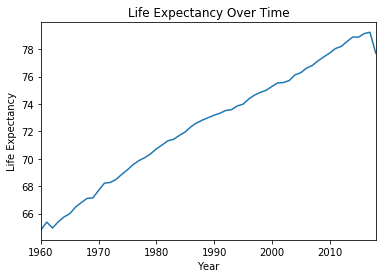

In [15]:
#Life Expectancy over time for 44 countries listed in life exp file from 1970.

life_1970.groupby('TIME')['Value'].mean().plot(kind='line')
plt.title("Life Expectancy Over Time")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.show()

In [16]:
total_1970 = usa_1970.loc[usa_1970['SUBJECT'] =='MEN']
total_1970.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
4719,USA,LIFEEXP,MEN,YR,A,1960,66.6,NaN
4720,USA,LIFEEXP,MEN,YR,A,1961,67.1,NaN
4721,USA,LIFEEXP,MEN,YR,A,1962,66.9,NaN
4722,USA,LIFEEXP,MEN,YR,A,1963,66.6,NaN
4723,USA,LIFEEXP,MEN,YR,A,1964,66.8,NaN


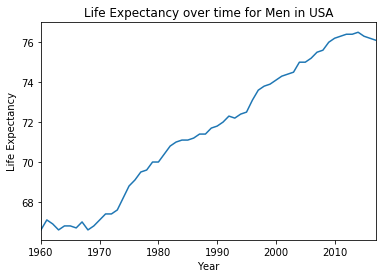

In [17]:
#life expectancy over time for men in USA

total_1970.plot(x="TIME", y="Value", kind='line', legend=False)
plt.title("Life Expectancy over time for Men in USA")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.show()

In [18]:
life_exp.columns = life_exp.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
life_exp

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [19]:
life_exp.dropna(subset = ['life_expectancy'])
life_exp

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


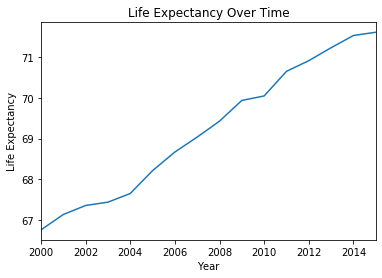

In [20]:
#life expectancy over time 2000-2015 with all countries


life_exp.groupby('year')['life_expectancy'].mean().plot(kind='line')
plt.title("Life Expectancy Over Time")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.show()


In [27]:
csv_path_2 = "Resources/GDP_1970_to_2018_wLatLng.csv"

gdp_life = pd.read_csv(csv_path_2)
gdp_life

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2012,2013,2014,2015,2016,2017,2018,2019,Latitude,Longitude
0,Afghanistan,AFG,0.174889,0.183111,0.159556,0.173333,0.215556,0.236667,0.255556,0.295333,...,2.000162,2.056105,2.048487,1.990711,1.936264,2.019176,1.936297,NaN,33.939110,67.709953
1,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.231978,1.277628,1.322824,1.138693,1.186135,1.302506,1.510250,NaN,41.153332,20.168331
2,Algeria,DZA,0.486349,0.507722,0.676179,0.871511,1.320971,1.555793,1.772835,2.097190,...,20.906289,20.975476,21.380881,16.597843,16.003293,16.739027,17.375795,NaN,28.033886,1.659626
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.064400,0.064100,0.064200,0.066100,0.065200,0.060200,0.063600,NaN,-14.270972,-170.132217
4,Andorra,AND,0.007862,0.008941,0.011341,0.015082,0.018656,0.022013,0.022728,0.025402,...,0.316462,0.328159,0.335074,0.281149,0.287731,0.301339,0.323654,NaN,42.506285,1.521801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,United States Virgin Islands,VIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.409500,0.376200,0.362200,0.374800,0.386300,0.385500,NaN,NaN,18.335765,-64.896335
211,West Bank and Gaza,PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.127940,1.247600,1.271560,1.267300,1.342570,1.449810,1.461590,NaN,31.946570,35.302723
212,Yemen,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.540134,4.041523,4.322859,4.262833,3.096824,2.681870,2.691440,NaN,15.552727,48.516388
213,Zambia,ZMB,0.182529,0.168700,0.191071,0.226871,0.312183,0.261867,0.274671,0.248300,...,2.550337,2.804546,2.715063,2.124335,2.095475,2.586814,2.672007,NaN,-13.133897,27.849332


In [49]:
new_gdp.columns = new_gdp.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
new_gdp.dropna()


,country_name,2000
1,Albania,0.348036
2,Algeria,5.478607
4,Andorra,0.143443
5,Angola,0.912959
6,Antigua and Barbuda,0.083016
...,...,...
209,Vietnam,3.117252
211,West Bank and Gaza,0.431360
212,Yemen,0.965244
213,Zambia,0.360068


In [56]:
year_2000 = life_exp.loc[life_exp['year'] ==2000]
year_2000

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
15,Afghanistan,2000,Developing,54.8,321.0,88,0.01,10.424960,62.0,6532,...,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5
31,Albania,2000,Developing,72.6,11.0,1,3.66,91.711541,96.0,662,...,97.0,6.26,97.0,0.1,1175.788981,38927.0,2.1,2.2,0.656,10.7
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
63,Angola,2000,Developing,45.3,48.0,97,1.85,15.881493,NaN,2219,...,3.0,2.79,28.0,2.0,555.296942,1644924.0,1.9,1.9,0.382,4.6
79,Antigua and Barbuda,2000,Developing,73.6,156.0,0,7.27,1127.743470,NaN,0,...,96.0,4.13,95.0,0.1,9875.161736,NaN,3.7,3.6,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,Venezuela (Bolivarian Republic of),2000,Developing,72.5,168.0,11,8.01,0.000000,5.0,22,...,86.0,4.91,77.0,0.1,NaN,NaN,1.8,1.7,0.670,10.6
2889,Viet Nam,2000,Developing,73.4,139.0,33,1.60,0.000000,NaN,16512,...,96.0,4.89,96.0,0.1,NaN,NaN,15.8,16.4,0.569,10.4
2905,Yemen,2000,Developing,68.0,252.0,48,0.07,0.000000,14.0,0,...,74.0,4.14,74.0,0.1,NaN,NaN,14.1,14.1,0.436,7.7
2921,Zambia,2000,Developing,43.8,614.0,44,2.62,45.616880,NaN,30930,...,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,7.5,0.418,9.6


In [50]:
renamed_2000 = year_2000.rename(columns={"country":"country_name"})
renamed_2000.head()

,country_name,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
15,Afghanistan,2000,Developing,54.8,321.0,88,0.01,10.424960,62.0,6532,...,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5
31,Albania,2000,Developing,72.6,11.0,1,3.66,91.711541,96.0,662,...,97.0,6.26,97.0,0.1,1175.788981,38927.0,2.1,2.2,0.656,10.7
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
63,Angola,2000,Developing,45.3,48.0,97,1.85,15.881493,NaN,2219,...,3.0,2.79,28.0,2.0,555.296942,1644924.0,1.9,1.9,0.382,4.6
79,Antigua and Barbuda,2000,Developing,73.6,156.0,0,7.27,1127.743470,NaN,0,...,96.0,4.13,95.0,0.1,9875.161736,NaN,3.7,3.6,0.000,0.0


In [60]:
#merge life expectancy sorted to 2000 with GDP year 2000 on country

merge_table = pd.merge(renamed_2000, new_gdp, on='country_name')
merge_table.dropna()




,country_name,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,2000
1,Albania,2000,Developing,72.6,11.0,1,3.66,91.711541,96.0,662,...,6.26,97.0,0.1,1175.788981,38927.0,2.1,2.2,0.656,10.7,0.348036
6,Armenia,2000,Developing,72.0,142.0,1,2.90,32.756269,55.0,15,...,6.25,93.0,0.1,622.742748,369588.0,2.1,2.2,0.639,11.2,0.191156
8,Austria,2000,Developed,78.1,96.0,0,13.20,3557.455507,33.0,0,...,1.60,81.0,0.1,24517.267450,811566.0,1.7,1.9,0.833,15.4,19.679978
13,Belarus,2000,Developing,68.0,247.0,1,12.98,24.249478,7.0,21,...,6.13,99.0,0.1,1276.288340,997961.0,2.7,2.8,0.675,13.1,1.273686
14,Belgium,2000,Developed,77.6,11.0,1,11.21,287.208453,6.0,0,...,8.12,95.0,0.1,2327.459100,125125.0,0.8,0.8,0.869,18.0,23.620453
15,Belize,2000,Developing,68.3,196.0,0,4.79,219.023984,76.0,0,...,3.98,91.0,0.3,3364.423711,247315.0,3.8,3.7,0.668,11.7,0.083207
17,Bhutan,2000,Developing,62.0,312.0,1,0.17,93.358728,98.0,418,...,6.91,92.0,0.1,765.863236,573416.0,19.2,19.9,0.000,7.3,0.043916
19,Botswana,2000,Developing,47.8,647.0,2,5.37,250.891648,86.0,2672,...,4.64,97.0,38.8,3349.688230,172834.0,12.3,12.2,0.559,11.7,0.578833
20,Brazil,2000,Developing,75.0,183.0,111,7.26,179.477729,94.0,36,...,7.30,98.0,0.1,3739.119360,175287587.0,3.4,3.4,0.677,14.1,65.542065
21,Bulgaria,2000,Developed,71.1,163.0,1,9.69,15.235727,94.0,46,...,6.70,93.0,0.1,169.285860,817172.0,2.5,2.5,0.709,12.9,1.315302


The r-squared is: nan


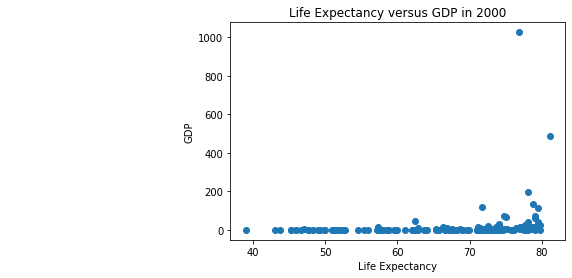

In [62]:
#life expectancy versus GDP 2000

x_values = merge_table['life_expectancy']
y_values = merge_table['2000']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Life Expectancy versus GDP in 2000")
plt.xlabel("Life Expectancy")
plt.ylabel("GDP")
print(f"The r-squared is: {rvalue}")
plt.show()